<a href="https://colab.research.google.com/github/Manreet10/Data-Cleaning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BENGALURU HOUSING PROJECT - DATA CLEANING**


---

### Goal of the Project:

This project is designed for:

 - Creating box plots
 - Slicing a DataFrame
 - Treating missing values 

---

### Context

A techie, residing in Mumbai, who is a data scientist got an excellent job opportunity from one of his dream company in Bengaluru. He soon wants to shift to Bengaluru and hence, he decides to buy a home in the city.

Buying a home, especially in a city like Bengaluru, is a tricky choice.
As he is a data scientist he manages to find the dataset for Bengaluru house prices on the internet.

The dataset he found was vast with some useless information and some empty values. He only wants to extract some of the useful information from the dataset.

---

### Problem Statement

The dataset acquired by the techie is full of irregularities, incorrect values, and missing values. As a data scientist (or analyst in this context), your task is to clean the dataset given to you. 

This process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted is known as **data cleaning**.


---

### Dataset Information

This dataset contains several factors that a potential home buyer considers before purchasing a house. Here are the factors:

1. `area_type`: Whether the house has a built-up area or plot area.

2. `availability`: Whether the house is in the ready-to-move state or is there an exact date on which the house will be ready for occupancy.

3. `location`: The name of the locality in Bengaluru where the house is situated.

4. `size`: Whether the house is 1 BHK, 2 BHK, 3 BHK, etc. The term BHK stands for *Bedroom, Hall & Kitchen*.

5. `society`: Name of the society where the house is located.

6. `total_sqft`: The total area of the house in square feet.

7. `bath`: Number of bathrooms in the house.

8. `balcony`: Number of balconies in the house.

9. `price`: Price of the house in lakhs (Indian rupees).


---

### Things To Do

- Create a Pandas DataFrame for the Bengaluru house prices dataset.

- Find the missing values in the DataFrame and replace them with the right missing values. However, if a column has more than 15% missing values then drop (or remove) the column from the DataFrame except for the `location`, `size` and `total_sqft` columns because the house prices are directly dependent on these three crucial parameters. *In fact, the rate of a house is reported as a cost per unit area of the house*.

- Drop (or remove) the rows containing the missing values in the `location`,	`size`, and `total_sqft` columns. Additionally, drop any row which contains nonsensical values in the context of houses.

---

In [ ]:
# Import the 'pandas', 'matplotlib.pyplot' and 'seaborn' modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


---

#### 2. Load The Dataset

Create a Pandas DataFrame by loading the dataset which is provided in the comma-separated values (CSV) file. Also, display the number of rows and columns in the DataFrame. Here's the link to the dataset:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/bengaluru-house-prices/Bengaluru_House_Prices.csv

In [ ]:
# Create the DataFrame using the 'read_csv()' function of the 'pandas' module
# Dataset Link: https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/bengaluru-house-prices/Bengaluru_House_Prices.csv
house_rent_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/bengaluru-house-prices/Bengaluru_House_Prices.csv')

In [ ]:
# Display the number of rows and columns using the 'shape' keyword.
house_rent_df.shape

(13320, 9)

---

#### 3. Check For The Missing Values

In [ ]:
# Find the total number of missing values in each column.
missing_values = house_rent_df.isnull().sum()
missing_values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# Find the percentage of missing values
num = missing_values*100
den = house_rent_df.shape[0]
percentage = num/den
print(percentage)


area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


---

---

#### 4.1 Removing Rows From The `location` Column

You need to remove all the rows containing the missing values in the `location` column.

In [ ]:
# Get all the rows having the missing values in the 'location'.
invalid_location_df = house_rent_df.loc[house_rent_df['location'].isnull()==True,:]
invalid_location_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [ ]:
# Discard the rows containing the missing values in the 'location' column.
valid_location_df = house_rent_df.loc[house_rent_df['location'].isnull()==False,:]
valid_location_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


---

#### 4.2 Removing Rows From The `size` Column

Now, you need to remove all the rows containing the missing values in the `size` column.

In [ ]:
# Get the rows having the missing values in the 'size' column.
invalid_size_df = valid_location_df.loc[valid_location_df['size'].isnull()==True,:]
invalid_size_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [ ]:
# Total number of rows having the missing values in the 'size' column.
invalid_size_df.shape[0]

16

In [ ]:
# Discard the rows containing the missing values in the 'size' column.
valid_size_df = valid_location_df.loc[valid_location_df['size'].isnull()== False,:]
valid_size_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


---

#### 4.3 Removing Rows From The `total_sqft` Column

Now, you need to remove all the rows containing the missing values in the `total_sqft` column.

In [ ]:
# Get the rows having the missing values in the 'total_sqft' column.
invalid_sqft_df = house_rent_df.loc[house_rent_df['total_sqft'].isnull()==True,:]
invalid_sqft_df.shape[0]

0

---

#### 4.3 Removing Rows From The `bath` Column

Assume that in a practical situation, no house, even in a city like Bengaluru, will have more than 5 bathrooms. Hence, drop all the rows in the `bath` column containing more than 5 bathrooms.

In [ ]:
# Get the rows having more than 5 bathrooms in the 'bath' column.
invalid_bath_df = valid_size_df.loc[valid_size_df['bath']>5]
invalid_bath_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,NaN,600,9.0,NaN,200.0
64,Built-up Area,Ready To Move,Bommanahalli,8 Bedroom,NaN,3000,8.0,0.0,140.0
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,NaN,1350,7.0,0.0,85.0
79,Built-up Area,Ready To Move,ISRO Layout,6 Bedroom,NaN,4400,6.0,3.0,250.0
...,...,...,...,...,...,...,...,...,...
13221,Plot Area,Ready To Move,T Dasarahalli,9 Bedroom,NaN,1178,9.0,1.0,75.0
13226,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,8 Bedroom,NaN,6000,8.0,3.0,215.0
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,NaN,1400,7.0,NaN,218.0
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,NaN,1500,6.0,2.0,145.0


In [ ]:
# Discard the rows having more than 5 bathrooms in the 'bath' column.
valid_bath_df = valid_size_df.loc[valid_size_df['bath']<5]
valid_bath_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


---

### 5. Data Cleaning - Columns 

Compute the percentage of missing values in the DataFrame again. If a column has more than 15% missing values then drop (or remove) the column from the DataFrame. 


In [ ]:
# Percentage of missing values.
num1 = (valid_bath_df.isnull().sum())*100
den1 = house_rent_df.shape[0]
percent = num1/den1
percent

area_type        0.000000
availability     0.000000
location         0.000000
size             0.000000
society         35.878378
total_sqft       0.000000
bath             0.000000
balcony          2.507508
price            0.000000
dtype: float64

---

#### 5.1 Columns To Be Retained

Create a list of columns that need to be retained and store it in a variable `cols_to_keep`. 

 - area_type        
 - availability     
 - location         
 - size                    
 - total_sqft      
 - bath            
 - balcony         
 - price           

In [ ]:
# Create a list of the columns to be retained.   
columns_retained = ['area_type','availability','location','size','total_sqft','bath','balcony','price']

---

#### 5.2 Retaining Columns

Retain appropriate columns in the DataFrame.

In [ ]:
# Retain the appropriate columns in the DataFrame using the 'loc[]' function.
final_columns = valid_bath_df.drop(['society'], axis=1)
final_columns

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
# Percentage of the missing values in the DataFrame.
num4 = (final_columns.isnull().sum())*100
den4 = house_rent_df.shape[0]
final_percentage = num4/den4
final_percentage

area_type       0.000000
availability    0.000000
location        0.000000
size            0.000000
total_sqft      0.000000
bath            0.000000
balcony         2.507508
price           0.000000
dtype: float64

---

#### 6 Replace The Missing Values 

While performing this task, you need to make sure that the replaced values do not drastically affect the trend of the values in the identified column(s) from the entire dataset.

You can check the trend of the values by creating a box plot before and after replacing the missing (or null) values with the appropriate values.

- Since the number of bedrooms or the number of bathrooms value is a discrete value, you need to replace the missing values with either the modal value or the median value. 

- Replace the values in the identified column(s).

- Get the descriptive statistics of the identified column(s) and also create a box plot to ensure that the replaced values do not drastically affect the trend of the values.

**Notes**: 
- Make sure the replacement value makes sense in the real-world context. 
  
  For e.g., there can't be 2.5 bathrooms or 2.5 balconies in a house. 
  
- The replacement value should make sense in the context of the house configuration. For e.g., a 2 BHK house having 5 bathrooms doesn't make sense. Similarly, a 2 BHK house having 5 balconies doesn't make sense.

In [ ]:
# Get the descriptive statistics of the 'balcony' column using the 'describe()' function.
valid_bath_df['balcony'].describe()

count    11873.000000
mean         1.568685
std          0.799798
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


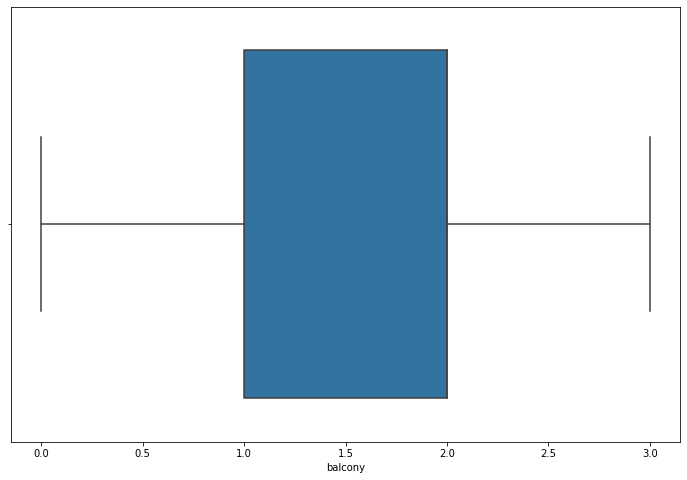

In [ ]:
# Create boxplot before replacing the missing values in the identified column(s).
plt.figure(figsize=(12,8))
sb.boxplot(valid_bath_df['balcony'])
plt.show()

In [ ]:
# Computing the modal value in the 'balcony' column using the 'mode()' function.
modal_value = valid_bath_df['balcony'].mode()
print(modal_value)

0    2.0
dtype: float64


Now, let's replace the missing values with the appropriate replacement value. But first, create a list of row indices of the rows containing the missing values in the identified column(s).

In [ ]:
# Create a list of indices of the rows containing the missing values in the identified column(s).
row_index = valid_bath_df[valid_bath_df['balcony'].isnull()==True].index
row_index

Int64Index([    6,     7,    34,    40,   146,   153,   381,   397,   411,
              435,
            ...
            12957, 13024, 13051, 13060, 13075, 13164, 13197, 13217, 13232,
            13309],
           dtype='int64', length=334)

In [ ]:
# Replace the missing values in the 'balcony' with the appropriate value.

valid_bath_df.loc[row_index,'balcony']= 2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# Display the first 5 rows of the DataFrame, after replacing the missing values in the identified column(s).
valid_bath_df.loc[row_index,:]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,2.0,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,2.0,600.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,Kantsce,1925,3.0,2.0,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,Gentson,1296,2.0,2.0,81.00
146,Super built-up Area,Ready To Move,Kothanur,3 BHK,Somumys,1828,3.0,2.0,110.00
...,...,...,...,...,...,...,...,...,...
13164,Super built-up Area,Ready To Move,Sarjapur Road,2 BHK,Tiare S,1340,2.0,2.0,75.00
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,2.0,2600.00
13217,Plot Area,Ready To Move,T Dasarahalli,6 Bedroom,NaN,1200,3.0,2.0,125.00
13232,Super built-up Area,Ready To Move,R.T. Nagar,3 BHK,SiineSu,1667,3.0,2.0,130.00


In [ ]:
# Check for the missing values again.
valid_bath_df['balcony'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


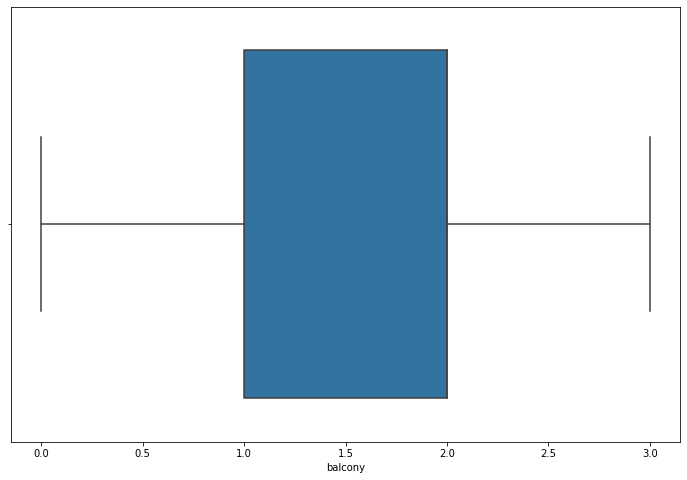

In [ ]:
# Create a box plot after replacing the missing values using the 'boxplot()' function.
plt.figure(figsize=(12,8))
sb.boxplot(valid_bath_df['balcony'])
plt.show()

In [ ]:
# Get the descriptive statistics.
valid_bath_df['balcony'].describe()

count    12207.000000
mean         1.580487
std          0.791911
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

---

#### 7 Convert Data-Types

The values in the `bath` and `balcony` columns are whole numbers and should be of integer data type.

 Hence you need to convert the values in the `bath` and `balcony` columns to integer values.

In [ ]:
# Convert the values in the 'bath' and 'balcony' columns to integer values using the 'astype()' function.
valid_bath_df['bath'] = valid_bath_df['bath'].astype(int)
valid_bath_df['balcony'] = valid_bath_df['balcony'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Syntax**: `df['column_name'] = df['column_name'].astype('int')`

In [ ]:
# Print the data-types of the values in the 'bath' and 'balcony' columns.
print(valid_bath_df['bath'].dtype)
print(valid_bath_df['balcony'].dtype)

int64
int64


In [ ]:
# Display the first 5 rows of the DataFrame.
valid_bath_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,1,1,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,3,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,1,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,1,1,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,1,1,38.00


---

---